# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Dataset**: Bike Details Dataset (Kaggle).

**Deskripsi**: Dataset ini berisi informasi harga motor bekas dengan fitur nama motor, tahun, harga jual, tipe penjual, status kepemilikan, dan jarak tempuh.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
df = pd.read_csv('BIKE DETAILS.csv')

df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [11]:
df.shape

(1061, 7)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
print(df.info())
print("\nJumlah data kosong:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
None

Jumlah data kosong:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [13]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat yang ditemukan: {duplicate_count}")

df = df.drop_duplicates(keep='first')
print(f"Jumlah baris setelah duplikat dihapus: {len(df)}")

Jumlah data duplikat yang ditemukan: 6
Jumlah baris setelah duplikat dihapus: 1055


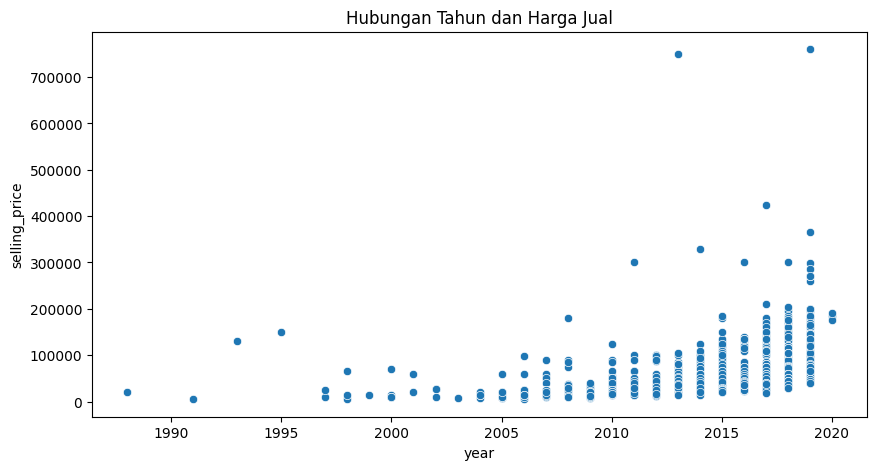

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Hubungan Tahun dan Harga Jual')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')

median_price = df['ex_showroom_price'].median()
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(median_price)

print(df.isnull().sum())

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategori yang ditemukan:", categorical_cols)

le = LabelEncoder()
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

Kolom kategori yang ditemukan: ['name', 'seller_type', 'owner']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,179,175000,2019,1,0,350,72752.5
1,145,45000,2017,1,0,5650,72752.5
2,183,150000,2018,1,0,12000,148114.0
3,260,65000,2015,1,0,23000,89643.0
4,269,20000,2011,1,1,21000,72752.5


In [22]:
numerical_features = ['year', 'km_driven', 'ex_showroom_price']

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,179,175000,1.191746,1,0,-0.656795,-0.150158
1,145,45000,0.727029,1,0,-0.554248,-0.150158
2,183,150000,0.959388,1,0,-0.431385,1.103654
3,260,65000,0.262312,1,0,-0.218553,0.130855
4,269,20000,-0.667122,1,1,-0.257250,-0.150158


In [19]:
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Ukuran X_train: (844, 6)
Ukuran X_test: (211, 6)


In [21]:
train_data = X_train.copy()
train_data['selling_price'] = y_train.values

test_data = X_test.copy()
test_data['selling_price'] = y_test.values

train_data.to_csv('motor_train.csv', index=False)
test_data.to_csv('motor_test.csv', index=False)
df_encoded.to_csv('motor_preprocessed.csv', index=False)

print("Semua file CSV berhasil disimpan di folder preprocessing!")

Semua file CSV berhasil disimpan di folder preprocessing!
